<a href="https://colab.research.google.com/github/DangPhan23/AI_W11_14_4_2023/blob/main/AI_W11_14_4_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [6]:
x_train = x_train.reshape(60000, 28, 28,1) #',1': 1 kenh
x_test = x_test.reshape(10000, 28, 28,1) #',1': 1 kenh

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test.shape

(10000, 28, 28, 1)

In [9]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train,10)

In [10]:
y_train.shape

(60000, 10)

In [19]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam
classes=10
epochs=20
batch_size=64


In [12]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same')) #32 lan tich chap
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same')) #64 lan tich chap
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same')) #128 lan tich chap
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [13]:
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(x_train, y_train, epochs=20, batch_size=64,verbose=1)

Epoch 1/20
938/938 [==============================] - 16s 4ms/step - loss: 0.1411 - accuracy: 0.9561
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0409 - accuracy: 0.9872
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0201 - accuracy: 0.9935
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0136 - accuracy: 0.9952
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0097 - accuracy: 0.9968
Epoch 8/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0101 - accuracy: 0.9966
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0098 - accuracy: 0.9969
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0069 - accuracy: 0.997

In [14]:
model.save('model1.csv')

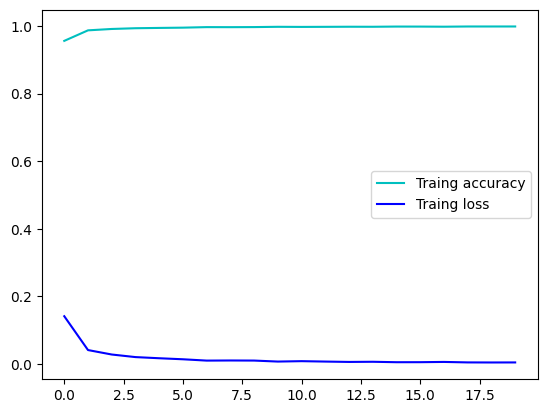

In [24]:
accuracy = train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'c',label='Traing accuracy')
plt.plot(epochs,loss,'b',label='Traing loss')
plt.legend()
plt.show()